## Intro Linear Regression

A technique that measures the relationship between two variables. If we have an independent variable  X, and a dependent outcome variable  Y, linear regression allows us to determine which linear model  Y=α+βX best explains the data.

Considering TSLA and SPY: We want to know how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.

Python's statsmodels library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for us to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

In [1]:
import yfinance as yf
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from matplotlib import style
from math import pi
import scipy.stats as stats

from statsmodels import regression
import statsmodels.api as sm
import math

yf.pdr_override()

First define a function that performs linear regression and plots the results.

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

Now, getting pricing data on TSLA and SPY and performing a regression.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.27
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           4.23e-14
Time:                        01:25:42   Log-Likelihood:                 549.18
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.532      0.595      -0.002       0.004
x1             1.9542      0.244      8.017      0.000       1.474       2.434
==============================================================================
Omnibus:                       64.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.770
Skew:                           0.865   Prob(JB):                     1.53e-82
Kurtosis:                       8.748   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

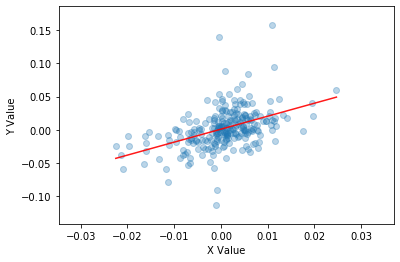

In [3]:
start_date = '2014-01-01'
end_date = '2015-01-01'
asset = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date, interval = "1d")['Adj Close']
benchmark = pdr.get_data_yahoo('SPY', start=start_date, end=end_date, interval = "1d")['Adj Close']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every 1% increased return we see from the SPY, we should see an extra 1.92% from TSLA. This is expressed by the parameter  β
 , which is 1.9271 as estimated. Of course, for decresed return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

### Linear Regression vs. Correlation

- Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
- Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
- Both are measures of covariance.
- Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

#### Knowing Parameters vs. Estimates

It is very important to keep in mind that all  α
  and  β
  parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The parameters you estimate today may not be the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates. More material on the standard error will be presented in a later lecture. One way to get a sense of how stable your parameter estimates are is to estimate them using a rolling window of data and see how much variance there is in the estimates.


#### An Example Case

What happens if we regress two purely random variables?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1094
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.742
Time:                        01:25:43   Log-Likelihood:                -24.995
No. Observations:                 100   AIC:                             53.99
Df Residuals:                      98   BIC:                             59.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5418      0.059      9.202      0.000       0.425       0.659
x1            -0.0346      0.105     -0.331      0.742      -0.242       0.173
==============================================================================
Omnibus:                       70.239   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.918
Skew:                          -0.153   Prob(JB):                       0.0191
Kurtosis:                       1.656   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

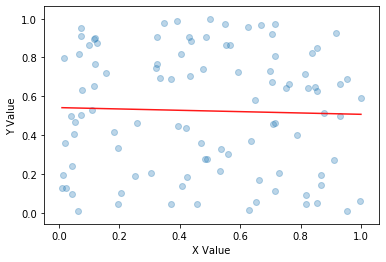

In [4]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

The above shows a fairly uniform cloud of points. It is important to note that even with 100 samples, the line has a visible slope due to random chance. This is why it is crucial that you use statistical tests and not visualizations to verify your results.


#### Further Example

Now let's make Y dependent on X plus some random noise.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           5.34e-27
Time:                        01:25:43   Log-Likelihood:                 22.245
No. Observations:                 100   AIC:                            -40.49
Df Residuals:                      98   BIC:                            -35.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0240      0.037      0.654      0.515      -0.049       0.097
x1             0.9734      0.065     14.936      0.000       0.844       1.103
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.115
Skew:                           0.059   Prob(JB):                        0.347
Kurtosis:                       2.298   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

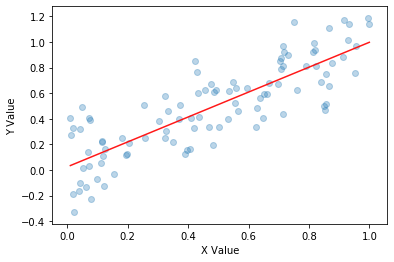

In [5]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y)

In a situation like this one, the line of best fit does indeed model the dependent variable Y quite well (with a high  R-squared
  value).


## Evaluating and Reporting Results

The regression model relies on several assumptions:

- The independent variable is not random.
- The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
- The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
- The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the  R-squared
  value tells us the fraction of the total variation of  Y
  that is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but a confidence interval. The linear regression reports 95% confidence intervals for the regression parameters, and we can visualize what this means using the seaborn library, which plots the regression line and highlights the 95% (by default) confidence interval for the regression line.